<p><font size="6"><b>Python GeoPandas appetizer</b></font></p>

> *Introduction to GIS scripting*  
> *May, 2017*

> *© 2017, Stijn Van Hoey (<mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, we will explore some of the functionalities of [`GeoPandas`](http://geopandas.org/) as a first introduction to how we can build on top of the Python standard library and the scientific Python ecosystem.

Some new functionalities are required for this showcase (but will be discussed later in more detail):

In [5]:
import mplleaflet
import geopandas as gpd

Similar to reading in `csv` files with `Pandas`, geoPandas provides reading methods/functions to read GIS-formats from file:

In [6]:
deelbekkens = gpd.read_file("../data/deelbekkens/Deelbekken.shp")

In [7]:
deelbekkens.head()

,BEKNAAM,BEKNR,DEELBEKKEN,LENGTE,OIDN,OPPERVL,STRMGEB,UIDN,geometry
0,Boven-Scheldebekken,6,06-02,35788.31,41,3.424316e+07,Schelde,142,"POLYGON ((98710.32800000161 162573.7030000016,..."
1,Demerbekken,9,09-02,73615.82,67,1.412802e+08,Schelde,812,"POLYGON ((201200.3610000014 183565.3020000011,..."
2,Leiebekken,5,05-04,65791.53,37,8.875261e+07,Schelde,936,"POLYGON ((74660.39793749899 190219.0009999983,..."
3,Boven-Scheldebekken,6,06-03,71432.94,42,1.782935e+08,Schelde,939,"POLYGON ((101010.7037499994 175254.0949999988,..."
4,Boven-Scheldebekken,6,06-04,71988.34,43,1.584879e+08,Schelde,940,"POLYGON ((105339.2030000016 188480.7000624985,..."


<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> It is like a DataFrame, but with a Geometry column attached to it!
    </ul>
</div>

We can check the geometry information in more detail, to see if we are dealing with POINT, LINE or POLYGON data:

In [8]:
deelbekkens.geometry.head()

0    POLYGON ((98710.32800000161 162573.7030000016,...
1    POLYGON ((201200.3610000014 183565.3020000011,...
2    POLYGON ((74660.39793749899 190219.0009999983,...
3    POLYGON ((101010.7037499994 175254.0949999988,...
4    POLYGON ((105339.2030000016 188480.7000624985,...
Name: geometry, dtype: object

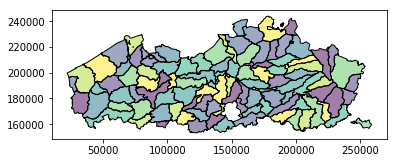

In [9]:
deelbekkens.plot()

Selecting the **Nete** from this shapefile (any `BEKNAAM` that contains Nete as name), just as we would do in Pandas:

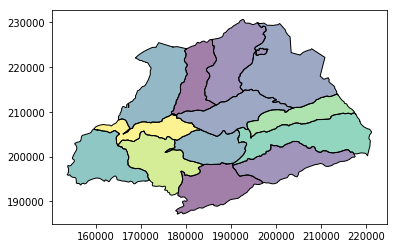

In [10]:
nete = deelbekkens[deelbekkens["BEKNAAM"].str.lower().str.contains('nete')].copy()
# Remark: you can off course also use: deelbekkens[deelbekkens["BEKNAAM"] == "Netebekken"]
nete.plot()

<div class="alert alert-info">
    <b>REMEMBER</b>: 
    <ul>
        <li> The usage of boolean indexing is just the same as we did it with Numpy/Pandas...
    </ul>
</div>

Getting the current projection information

In [11]:
nete.crs

{'ellps': 'intl',
 'lat_0': 90,
 'lat_1': 49.8333339,
 'lat_2': 51.16666723333333,
 'lon_0': 4.367486666666666,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'm',
 'x_0': 150000.01256,
 'y_0': 5400088.4378}

<div class="alert alert-danger">
    <b>ATTENTION</b>: 
    <ul>
        <li> As we are dealing with spatial information, the **projection information** is crucial!
    </ul>
</div>

Converting to `WGS84`, which is represented by the [EPSG code 4326](http://spatialreference.org/ref/epsg/wgs-84/) enables us easy combination with open street map backgrounds:

In [12]:
nete_wgs84 = nete.to_crs({'init': 'epsg:4326'}) # method that converts the projection to the given EPSG code

In [13]:
nete_wgs84.crs

{'init': 'epsg:4326'}

We want to plot the data on an interactive map. For small datasets, a convenient Package, called [`mplleaflet`](https://github.com/jwass/mplleaflet) exists:

In [14]:
fig, ax = plt.subplots()
nete_wgs84.plot(ax=ax)
nete_wgs84.centroid.plot(ax=ax, markersize=10)  # Add the centroids of the individual polygons to the plot
mplleaflet.display()

Some derived spatial attributes are directly available to the object, such as the area of each polygon:

In [15]:
nete_wgs84.area

10     0.015730
12     0.015746
14     0.015385
41     0.011933
69     0.017026
70     0.022380
80     0.011189
89     0.016462
90     0.008961
91     0.012096
92     0.018783
93     0.029109
101    0.020618
dtype: float64

Adding a **buffer** to our polygons is a method available to the geometry of the `geoDataFrame`:

Add a buffered version of the geometry as an additional column to the data:

In [16]:
nete["buffered_1000"] = nete.geometry.buffer(1000)

In [17]:
nete.head()

,BEKNAAM,BEKNR,DEELBEKKEN,LENGTE,OIDN,OPPERVL,STRMGEB,UIDN,geometry,buffered_1000
10,Netebekken,10,10-03,59209.30,82,1.227172e+08,Schelde,982,"POLYGON ((188940.7047500014 198339.7019375004,...","POLYGON ((177054.486954743 187150.9925692019, ..."
12,Netebekken,10,10-09,64826.31,88,1.227165e+08,Schelde,1020,"POLYGON ((204226.0362500027 203324.5498124994,...","POLYGON ((189444.9653970161 198035.0961898574,..."
14,Netebekken,10,10-07,66432.43,86,1.196548e+08,Schelde,1041,"POLYGON ((194785.0951875001 214766.2020624988,...","POLYGON ((176974.5782636238 208243.674105004, ..."
41,Netebekken,10,10-08,49095.42,87,9.294065e+07,Schelde,1169,"POLYGON ((183516.3622500002 205858.0518124998,...","POLYGON ((175694.5721767615 199957.1560016522,..."
69,Netebekken,10,10-01,58932.83,80,1.326798e+08,Schelde,1227,"POLYGON ((160260.2029374987 205907.5017499998,...","POLYGON ((152818.0146732014 196691.2176390541,..."


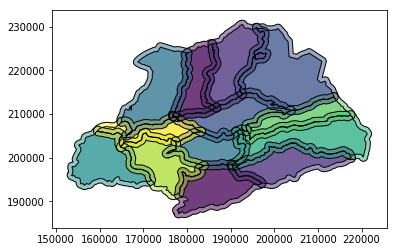

In [18]:
# Plot both of the polygons together:
fig, ax = plt.subplots()
nete.plot(ax=ax)
nete.set_geometry("buffered_1000").plot(ax=ax)
ax.set_aspect('equal', 'datalim')

Let's introduce a second vector file, saved as a `Geojson` file (`filename.geojson`) with the EU defined 10K grid cells:

In [19]:
eu_10k_grids = gpd.read_file("../data/EUgrid10.geojson")
eu_10k_grids.crs # the projection is contained in the geojson file

{'init': 'epsg:4326'}

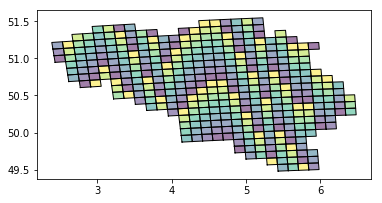

In [20]:
eu_10k_grids.plot()

In [21]:
eu_10k_grids.head(5)

,CellCode,EofOrigin,NofOrigin,geometry
0,10kmE379N312,3790000.0,3120000.0,"POLYGON ((2.429361848365367 50.9437587892485, ..."
1,10kmE379N313,3790000.0,3130000.0,"POLYGON ((2.414703469265138 51.03309331423895,..."
2,10kmE379N314,3790000.0,3140000.0,"POLYGON ((2.39997479452166 51.1224234251688, 2..."
3,10kmE380N309,3800000.0,3090000.0,"POLYGON ((2.613788188448232 50.68487195072306,..."
4,10kmE380N310,3800000.0,3100000.0,"POLYGON ((2.599603514850633 50.77424004455327,..."


We can make selections (cfr. `queries`) to our data on some kind of condition:

In [22]:
eu_10k_grids[eu_10k_grids["CellCode"].str.contains('N311')].plot()
mplleaflet.display()

Using a **spatial join**, extract those `10K gridcells` that intersect with the polygon of the Grote Nete study area (we use the original `nete` variable):

In [23]:
nete_10k = gpd.sjoin(eu_10k_grids, nete_wgs84, how="inner", op='intersects')

A plot to control the outcome:

In [24]:
fig, ax = plt.subplots()
nete_10k.plot(ax=ax)
nete_wgs84.plot(ax=ax)
mplleaflet.display()

In [25]:
nete_10k.crs

{'init': 'epsg:4326'}

**Save** the result of our analysis as a shapefile:

In [55]:
nete_10k.to_file("../scratch/nete_10k_grid.shp")  # But maybe a geojson is easier to manage (as it is one file...)

Nice, but.... how?